In [4]:
import gym
import numpy as np
import sys
import time
import pandas as pd
import matplotlib
from collections import defaultdict, namedtuple

%matplotlib inline
matplotlib.style.use('ggplot')

In [5]:
env = gym.make("CartPole-v0")

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


In [7]:
class SARSA():
    def __init__(self, env, num_episodes, discount=1.0, alpha=0.5, epsilon=0.1, n_bins=10):
        self.nA = env.action_space.n
        self.nS = env.observation_space.shape[0]
        self.env = env
        self.num_episodes = num_episodes
        self.discount = discount
        self.alpha = alpha
        self.epsilon = epsilon
        self.Q = defaultdict(lambda: np.zeros(self.nA))
        
        # Keeps track of useful statistics
        record = namedtuple("Record", ["episode_lengths","episode_rewards"])
        self.rec = record(episode_lengths=np.zeros(num_episodes),
                          episode_rewards=np.zeros(num_episodes))
        
        self.cart_position_bins = pd.cut([-2.4, 2.4], bins=n_bins, retbins=True)[1]
        self.pole_angle_bins = pd.cut([-2, 2], bins=n_bins, retbins=True)[1]
        self.cart_velocity_bins = pd.cut([-1, 1], bins=n_bins, retbins=True)[1]
        self.angle_rate_bins = pd.cut([-3.5, 3.5], bins=n_bins, retbins=True)[1]
        
    def __get_bins_states(self, state):
        """
        Case number of the sate is huge so in order to simplify the situation 
        cut the state sapece in to bins.
        
        if the state_idx is [1,3,6,4] than the return will be 1364
        """
        s1_, s2_, s3_, s4_ = state
        cart_position_idx = np.digitize(s1_, self.cart_position_bins)
        pole_angle_idx = np.digitize(s2_, self.pole_angle_bins)
        cart_velocity_idx = np.digitize(s3_, self.cart_velocity_bins)
        angle_rate_idx = np.digitize(s4_, self.angle_rate_bins)
        
        state_ = [cart_position_idx, pole_angle_idx, 
                  cart_velocity_idx, angle_rate_idx]
        
        state = map(lambda s: int(s), state_)
        return tuple(state)
        
    def __epislon_greedy_policy(self, epsilon, nA):

        def policy(state):
            A = np.ones(nA, dtype=float) * epsilon / nA
            best_action = np.argmax(self.Q[state])
            A[best_action] += (1.0 - epsilon)
            return A

        return policy

    def __next_action(self, prob):
        return np.random.choice(np.arange(len(prob)), p=prob)

    def sarsa(self):
        """
        SARSA algo
        """
        policy = self.__epislon_greedy_policy(self.epsilon, self.nA)
        sumlist = []

        for i_episode in range(self.num_episodes):
            if 0 == (i_episode+1) % 10:
                print("\r Episode {} in {}".format(i_episode+1, self.num_episodes))
                # sys.stdout.flush()

            step = 0
            state__ = self.env.reset()
            state = self.__get_bins_states(state__)
            prob_actions = policy(state)
            action = self.__next_action(prob_actions)

            # one step
            while(True):
                next_state__, reward, done, info = env.step(action)
                next_state = self.__get_bins_states(next_state__)
                
                prob_next_actions = policy(next_state)
                next_action = self.__next_action(prob_next_actions)

                # update history record
                self.rec.episode_lengths[i_episode] += reward
                self.rec.episode_rewards[i_episode] = step
                
                # TD update
                td_target = reward + self.discount * self.Q[next_state][next_action]
                td_delta = td_target - self.Q[state][action]
                self.Q[state][action] += self.alpha * td_delta

                if done: 
                    reward = -200
                    print("Episode finished after {} timesteps".format(step))
                    sumlist.append(step)
                    break
                else:
                    step += 1
                    state = next_state
                    action = next_action
                    
        iter_time = sum(sumlist)/len(sumlist)
        print("CartPole game iter average time is: {}".format(iter_time))
        return self.Q

cls_sarsa = SARSA(env, num_episodes=1000)
Q = cls_sarsa.sarsa()

Episode finished after 9 timesteps
Episode finished after 9 timesteps
Episode finished after 9 timesteps
Episode finished after 8 timesteps
Episode finished after 9 timesteps
Episode finished after 9 timesteps
Episode finished after 9 timesteps
Episode finished after 8 timesteps
Episode finished after 9 timesteps
 Episode 10 in 1000
Episode finished after 9 timesteps
Episode finished after 9 timesteps
Episode finished after 18 timesteps
Episode finished after 17 timesteps
Episode finished after 13 timesteps
Episode finished after 9 timesteps
Episode finished after 11 timesteps
Episode finished after 7 timesteps
Episode finished after 8 timesteps
Episode finished after 37 timesteps
 Episode 20 in 1000
Episode finished after 8 timesteps
Episode finished after 8 timesteps
Episode finished after 9 timesteps
Episode finished after 11 timesteps
Episode finished after 14 timesteps
Episode finished after 11 timesteps
Episode finished after 39 timesteps
Episode finished after 8 timesteps
Episod

Episode finished after 86 timesteps
Episode finished after 15 timesteps
Episode finished after 138 timesteps
Episode finished after 29 timesteps
Episode finished after 28 timesteps
Episode finished after 21 timesteps
Episode finished after 77 timesteps
Episode finished after 65 timesteps
Episode finished after 94 timesteps
Episode finished after 18 timesteps
 Episode 230 in 1000
Episode finished after 36 timesteps
Episode finished after 43 timesteps
Episode finished after 9 timesteps
Episode finished after 117 timesteps
Episode finished after 43 timesteps
Episode finished after 66 timesteps
Episode finished after 29 timesteps
Episode finished after 12 timesteps
Episode finished after 27 timesteps
Episode finished after 81 timesteps
 Episode 240 in 1000
Episode finished after 49 timesteps
Episode finished after 37 timesteps
Episode finished after 76 timesteps
Episode finished after 155 timesteps
Episode finished after 12 timesteps
Episode finished after 105 timesteps
Episode finished af

Episode finished after 24 timesteps
Episode finished after 66 timesteps
Episode finished after 22 timesteps
 Episode 440 in 1000
Episode finished after 106 timesteps
Episode finished after 22 timesteps
Episode finished after 7 timesteps
Episode finished after 39 timesteps
Episode finished after 119 timesteps
Episode finished after 91 timesteps
Episode finished after 166 timesteps
Episode finished after 77 timesteps
Episode finished after 36 timesteps
Episode finished after 136 timesteps
 Episode 450 in 1000
Episode finished after 168 timesteps
Episode finished after 80 timesteps
Episode finished after 24 timesteps
Episode finished after 13 timesteps
Episode finished after 46 timesteps
Episode finished after 80 timesteps
Episode finished after 74 timesteps
Episode finished after 68 timesteps
Episode finished after 101 timesteps
Episode finished after 11 timesteps
 Episode 460 in 1000
Episode finished after 66 timesteps
Episode finished after 81 timesteps
Episode finished after 47 timest

Episode finished after 127 timesteps
Episode finished after 147 timesteps
Episode finished after 72 timesteps
Episode finished after 33 timesteps
 Episode 660 in 1000
Episode finished after 48 timesteps
Episode finished after 46 timesteps
Episode finished after 43 timesteps
Episode finished after 33 timesteps
Episode finished after 118 timesteps
Episode finished after 67 timesteps
Episode finished after 103 timesteps
Episode finished after 75 timesteps
Episode finished after 90 timesteps
Episode finished after 32 timesteps
 Episode 670 in 1000
Episode finished after 61 timesteps
Episode finished after 36 timesteps
Episode finished after 42 timesteps
Episode finished after 102 timesteps
Episode finished after 44 timesteps
Episode finished after 14 timesteps
Episode finished after 12 timesteps
Episode finished after 37 timesteps
Episode finished after 18 timesteps
Episode finished after 18 timesteps
 Episode 680 in 1000
Episode finished after 31 timesteps
Episode finished after 21 timest

Episode finished after 140 timesteps
Episode finished after 199 timesteps
Episode finished after 99 timesteps
Episode finished after 199 timesteps
Episode finished after 34 timesteps
Episode finished after 86 timesteps
Episode finished after 101 timesteps
Episode finished after 29 timesteps
Episode finished after 23 timesteps
Episode finished after 39 timesteps
 Episode 880 in 1000
Episode finished after 38 timesteps
Episode finished after 45 timesteps
Episode finished after 30 timesteps
Episode finished after 37 timesteps
Episode finished after 68 timesteps
Episode finished after 57 timesteps
Episode finished after 53 timesteps
Episode finished after 61 timesteps
Episode finished after 164 timesteps
Episode finished after 125 timesteps
 Episode 890 in 1000
Episode finished after 45 timesteps
Episode finished after 43 timesteps
Episode finished after 39 timesteps
Episode finished after 27 timesteps
Episode finished after 42 timesteps
Episode finished after 67 timesteps
Episode finished

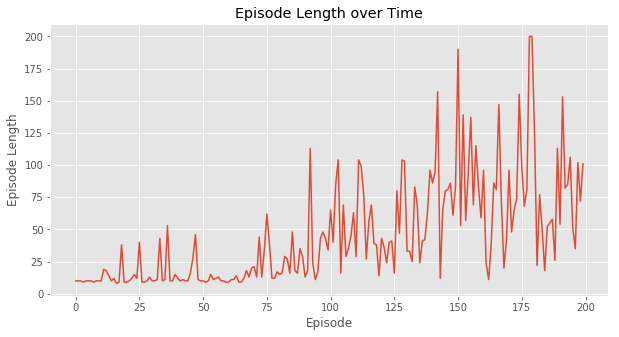

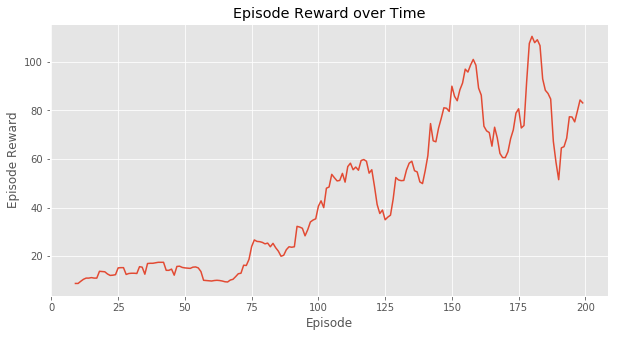

(<matplotlib.figure.Figure at 0x1114e7b8>,
 <matplotlib.figure.Figure at 0x1320e2e8>)

In [9]:
from matplotlib import pyplot as plt

def plot_episode_stats(stats, smoothing_window=10, noshow=False):
    # Plot the episode length over time
    fig1 = plt.figure(figsize=(10,5))
    plt.plot(stats.episode_lengths[:200])
    plt.xlabel("Episode")
    plt.ylabel("Episode Length")
    plt.title("Episode Length over Time")
    if noshow:
        plt.close(fig1)
    else:
        plt.show(fig1)

    # Plot the episode reward over time
    fig2 = plt.figure(figsize=(10,5))
    rewards_smoothed = pd.Series(stats.episode_rewards[:200]).rolling(smoothing_window, min_periods=smoothing_window).mean()
    plt.plot(rewards_smoothed)
    plt.xlabel("Episode")
    plt.ylabel("Episode Reward")
    plt.title("Episode Reward over Time".format(smoothing_window))
    if noshow:
        plt.close(fig2)
    else:
        plt.show(fig2)

    return fig1, fig2

plot_episode_stats(cls_sarsa.rec)